In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import joblib

In [ ]:
# Step 2: Load and Preprocess Data
df_og = pd.read_csv("/content/one_hot.csv")

In [ ]:
# Display the first few rows of the original data
print("Original DataFrame:")
print(df_og.head())

Original DataFrame:
                Name  # of Positions                  Degree  \
0  Vaishnavi Arolkar               5  Bachelor of Technology   
1   Kundan Choudhary               0  Bachelor of Technology   
2   Vikram Choudhary               2  Bachelor of Technology   
3   Anushri Deshmukh               6  Bachelor of Technology   
4         Raj Gandhi               3  Bachelor of Technology   

                    Course                               College  CGPA  HSC  \
0  Electronics Engineering  Sardar Patel Institute of Technology  8.77  NaN   
1  Electronics Engineering  Sardar Patel Institute of Technology  7.20  NaN   
2  Electronics Engineering  Sardar Patel Institute of Technology  7.05  NaN   
3  Electronics Engineering  Sardar Patel Institute of Technology  8.25  NaN   
4  Electronics Engineering  Sardar Patel Institute of Technology  7.75  NaN   

   SSC                                    Additional Info  # of tech skills  \
0  NaN  {'Key Values': {'cgpa': '8.77', '

In [ ]:
# Impute missing CGPA values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_og['CGPA'] = imputer.fit_transform(df_og[['CGPA']])

In [ ]:
# Display the data after imputation
print("\nDataFrame after CGPA Imputation:")
print(df_og.head())


DataFrame after CGPA Imputation:
                Name  # of Positions                  Degree  \
0  Vaishnavi Arolkar               5  Bachelor of Technology   
1   Kundan Choudhary               0  Bachelor of Technology   
2   Vikram Choudhary               2  Bachelor of Technology   
3   Anushri Deshmukh               6  Bachelor of Technology   
4         Raj Gandhi               3  Bachelor of Technology   

                    Course                               College  CGPA  HSC  \
0  Electronics Engineering  Sardar Patel Institute of Technology  8.77  NaN   
1  Electronics Engineering  Sardar Patel Institute of Technology  7.20  NaN   
2  Electronics Engineering  Sardar Patel Institute of Technology  7.05  NaN   
3  Electronics Engineering  Sardar Patel Institute of Technology  8.25  NaN   
4  Electronics Engineering  Sardar Patel Institute of Technology  7.75  NaN   

   SSC                                    Additional Info  # of tech skills  \
0  NaN  {'Key Values': {'cg

In [ ]:
# Drop irrelevant columns
df_og = df_og.drop(['College', 'HSC', 'SSC', 'Additional Info'], axis=1)

In [ ]:
# Display the data after dropping columns
print("\nDataFrame after Dropping Irrelevant Columns:")
print(df_og.head())


DataFrame after Dropping Irrelevant Columns:
                Name  # of Positions                  Degree  \
0  Vaishnavi Arolkar               5  Bachelor of Technology   
1   Kundan Choudhary               0  Bachelor of Technology   
2   Vikram Choudhary               2  Bachelor of Technology   
3   Anushri Deshmukh               6  Bachelor of Technology   
4         Raj Gandhi               3  Bachelor of Technology   

                    Course  CGPA  # of tech skills  # of non tech skills  \
0  Electronics Engineering  8.77                13                     4   
1  Electronics Engineering  7.20                 3                     1   
2  Electronics Engineering  7.05                11                     0   
3  Electronics Engineering  8.25                11                     4   
4  Electronics Engineering  7.75                 6                     2   

                   Role          Company  AI  ...  Public Relations  \
0                   SDE      Citius Tech 

In [ ]:
# One-hot encode specific categorical columns
columns_to_encode = ['Degree', 'Course']
df_og = pd.get_dummies(df_og, columns=columns_to_encode, drop_first=False)

In [ ]:
# Display the data after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
print(df_og.head())


DataFrame after One-Hot Encoding:
                Name  # of Positions  CGPA  # of tech skills  \
0  Vaishnavi Arolkar               5  8.77                13   
1   Kundan Choudhary               0  7.20                 3   
2   Vikram Choudhary               2  7.05                11   
3   Anushri Deshmukh               6  8.25                11   
4         Raj Gandhi               3  7.75                 6   

   # of non tech skills                  Role          Company  AI  AWS  \
0                     4                   SDE      Citius Tech   0    0   
1                     1                   SDE         Barclays   0    0   
2                     0               Analyst             KPMG   0    0   
3                     4  Associate Consultant           Oracle   0    0   
4                     2                   SDE  BNP Paribas CIB   0    0   

   Agile  ...  Sales  Strategic Planning  Team Building  Time Management  \
0      0  ...      0                   0             

In [ ]:
# Keep the original dataframe for final predictions
df = df_og.drop(['Name'], axis=1)

In [ ]:
# Duplicate data to increase size
df_copy = df.copy()
df = pd.concat([df, df_copy], ignore_index=True)

In [ ]:
# Step 3: Separate data for role and company prediction
df_role = df.copy()
df_role.dropna(subset=['Role'], inplace=True)
df_company = df.copy()
df_company.dropna(subset=['Company'], inplace=True)

In [ ]:
# Display the data after separating role and company prediction data
print("\nDataFrame for Role Prediction (after dropping missing 'Role'):")
print(df_role.head())
print("\nDataFrame for Company Prediction (after dropping missing 'Company'):")
print(df_company.head())


DataFrame for Role Prediction (after dropping missing 'Role'):
   # of Positions  CGPA  # of tech skills  # of non tech skills  \
0               5  8.77                13                     4   
1               0  7.20                 3                     1   
2               2  7.05                11                     0   
3               6  8.25                11                     4   
4               3  7.75                 6                     2   

                   Role          Company  AI  AWS  Agile  Amazon Web Services  \
0                   SDE      Citius Tech   0    0      0                    0   
1                   SDE         Barclays   0    0      0                    0   
2               Analyst             KPMG   0    0      0                    0   
3  Associate Consultant           Oracle   0    0      0                    0   
4                   SDE  BNP Paribas CIB   0    0      0                    0   

   ...  Sales  Strategic Planning  Team Buildi

In [ ]:
# Step 4: Separate features and target for both role and company predictions
X_role = df_role.drop(['Role', 'Company'], axis=1)
Y_role = df_role['Role']
X_company = df_company.drop(['Role', 'Company'], axis=1)
Y_company = df_company['Company']

In [ ]:
# Display the feature and target data for role prediction
print("\nFeatures for Role Prediction:")
print(X_role.head())
print("\nTarget for Role Prediction:")
print(Y_role.head())


Features for Role Prediction:
   # of Positions  CGPA  # of tech skills  # of non tech skills  AI  AWS  \
0               5  8.77                13                     4   0    0   
1               0  7.20                 3                     1   0    0   
2               2  7.05                11                     0   0    0   
3               6  8.25                11                     4   0    0   
4               3  7.75                 6                     2   0    0   

   Agile  Amazon Web Services  Android Development  Apache  ...  Sales  \
0      0                    0                    0       1  ...      0   
1      0                    0                    0       0  ...      1   
2      0                    0                    0       0  ...      0   
3      0                    0                    0       0  ...      0   
4      0                    0                    0       0  ...      0   

   Strategic Planning  Team Building  Time Management  Vendor Manag

In [ ]:
# Step 5: Data Scaling and Encoding
scaler = StandardScaler()
X_role_scaled = scaler.fit_transform(X_role)
X_company_scaled = scaler.fit_transform(X_company)

In [ ]:
# Display scaled feature data
print("\nScaled Features for Role Prediction:")
print(pd.DataFrame(X_role_scaled, columns=X_role.columns).head())

ohe_role = OneHotEncoder(sparse_output=False)
Y_role_encoded = ohe_role.fit_transform(Y_role.values.reshape(-1, 1))

ohe_company = OneHotEncoder(sparse_output=False)
Y_company_encoded = ohe_company.fit_transform(Y_company.values.reshape(-1, 1))


Scaled Features for Role Prediction:
   # of Positions      CGPA  # of tech skills  # of non tech skills        AI  \
0        0.760149  1.098379          0.494091              1.860181 -0.264575   
1       -1.450067 -1.526107         -1.493418             -0.257259 -0.264575   
2       -0.565980 -1.776854          0.096589             -0.963072 -0.264575   
3        1.202192  0.229123          0.096589              1.860181 -0.264575   
4       -0.123937 -0.606701         -0.897165              0.448554 -0.264575   

        AWS     Agile  Amazon Web Services  Android Development    Apache  \
0 -0.338502 -0.197066            -0.338502            -0.097129  4.102845   
1 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
2 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
3 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
4 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   

   ...     S

In [ ]:
# Display the encoded target data for role prediction
print("\nEncoded Target for Role Prediction:")
print(pd.DataFrame(Y_role_encoded, columns=ohe_role.categories_[0]).head())


Encoded Target for Role Prediction:
   Analyst  Analyst   Application Developer  Application Support Specialist  \
0      0.0       0.0                    0.0                             0.0   
1      0.0       0.0                    0.0                             0.0   
2      1.0       0.0                    0.0                             0.0   
3      0.0       0.0                    0.0                             0.0   
4      0.0       0.0                    0.0                             0.0   

   Assistant Product Manager  Associate Consultant  Associate Consultant   \
0                        0.0                   0.0                    0.0   
1                        0.0                   0.0                    0.0   
2                        0.0                   0.0                    0.0   
3                        0.0                   1.0                    0.0   
4                        0.0                   0.0                    0.0   

   Associate Developer  A

In [ ]:
# Step 6: Train-test Split
X_role_train, X_role_test, Y_role_train, Y_role_test = train_test_split(X_role_scaled, Y_role_encoded, test_size=0.2, random_state=42)
X_company_train, X_company_test, Y_company_train, Y_company_test = train_test_split(X_company_scaled, Y_company_encoded, test_size=0.2, random_state=42)

In [ ]:
# Display the training and testing split data
print("\nTraining Features for Role Prediction:")
print(pd.DataFrame(X_role_train, columns=X_role.columns).head())
print("\nTesting Features for Role Prediction:")
print(pd.DataFrame(X_role_test, columns=X_role.columns).head())


Training Features for Role Prediction:
   # of Positions      CGPA  # of tech skills  # of non tech skills        AI  \
0       -0.565980  0.546736          0.295340             -0.257259 -0.264575   
1        0.318106 -0.172073          0.494091              0.448554 -0.264575   
2       -0.565980 -1.776854          0.096589             -0.963072 -0.264575   
3       -0.565980  1.165245          0.096589              0.448554 -0.264575   
4        2.970364 -2.696260         -0.897165              1.154368 -0.264575   

        AWS     Agile  Amazon Web Services  Android Development    Apache  \
0 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
1 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
2 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
3 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   
4 -0.338502 -0.197066            -0.338502            -0.097129 -0.243733   

   ...    

In [ ]:
# Step 7: Train Gaussian Naive Bayes Model for Role and Company Prediction
role_model = GaussianNB()
role_model.fit(X_role_train, np.argmax(Y_role_train, axis=1))

company_model = GaussianNB()
company_model.fit(X_company_train, np.argmax(Y_company_train, axis=1))

GaussianNB()

In [ ]:
# Step 8: Evaluate Model Performance
# Role Predictions
role_predictions = role_model.predict(X_role_test)
role_accuracy = accuracy_score(np.argmax(Y_role_test, axis=1), role_predictions)
role_conf_matrix = confusion_matrix(np.argmax(Y_role_test, axis=1), role_predictions)
role_class_report = classification_report(np.argmax(Y_role_test, axis=1), role_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print(f"\nRole Prediction Accuracy: {role_accuracy}")


Role Prediction Accuracy: 0.6046511627906976


In [ ]:
print(f"\nConfusion Matrix for Role Prediction:\n {role_conf_matrix}")


Confusion Matrix for Role Prediction:
 [[3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
print(f"\nClassification Report for Role Prediction:\n {role_class_report}")


Classification Report for Role Prediction:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.67      0.67      0.67         3
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          27       0.00      0.00   

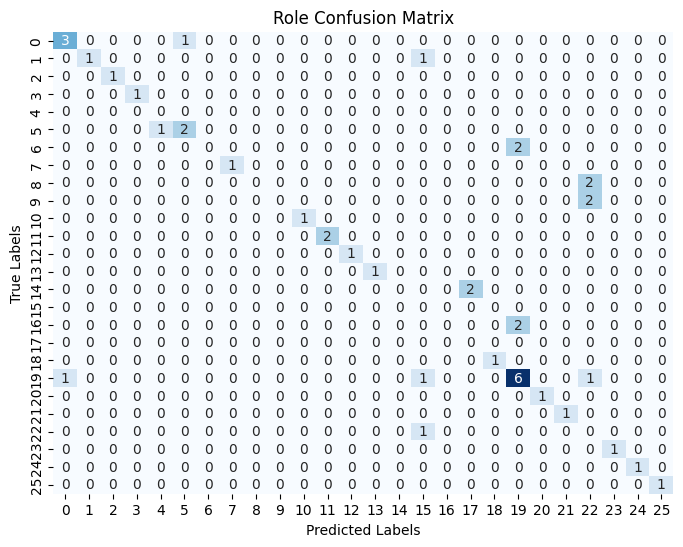

In [ ]:
# Plot Role Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(role_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Role Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [ ]:
# Company Predictions
company_predictions = company_model.predict(X_company_test)
company_accuracy = accuracy_score(np.argmax(Y_company_test, axis=1), company_predictions)
company_conf_matrix = confusion_matrix(np.argmax(Y_company_test, axis=1), company_predictions)
company_class_report = classification_report(np.argmax(Y_company_test, axis=1), company_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"\nCompany Prediction Accuracy: {company_accuracy}")


Company Prediction Accuracy: 0.813953488372093


In [ ]:
print(f"\nConfusion Matrix for Company Prediction:\n {company_conf_matrix}")


Confusion Matrix for Company Prediction:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
print(f"\nClassification Report for Company Prediction:\n {company_class_report}")


Classification Report for Company Prediction:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.40      1.00      0.57         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         2
          27       1.00      1.00      1.00         1
          31       0.00      0.00

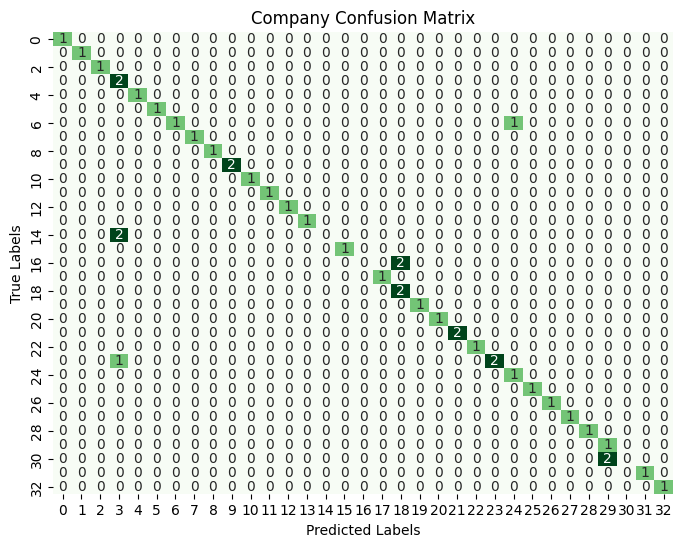

In [ ]:
# Plot Company Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(company_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Company Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [ ]:
# Step 9: Plot ROC and AUC Curve
def plot_roc_auc_curve(model, X_test, Y_test, title):
    y_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(np.argmax(Y_test, axis=1), y_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title(f'{title} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

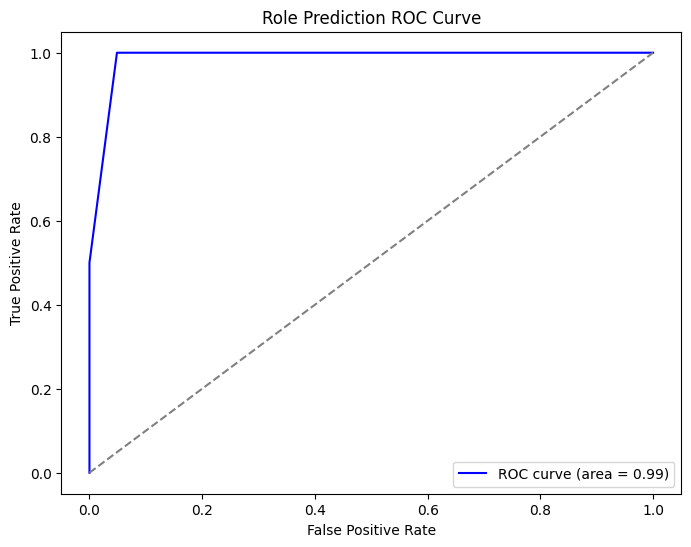

In [ ]:
plot_roc_auc_curve(role_model, X_role_test, Y_role_test, "Role Prediction")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


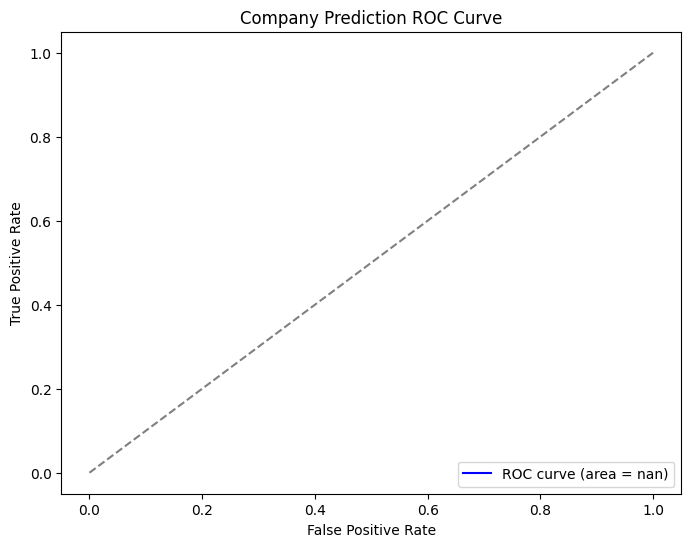

In [ ]:
plot_roc_auc_curve(company_model, X_company_test, Y_company_test, "Company Prediction")

In [ ]:
# Step 10: Model Output According to Name
def preprocess_input(df, name):
    data = df[df['Name'] == name]
    if data.empty:
        raise ValueError(f"No data found for the name: {name}")
    X_data = data.drop(['Name', 'Role', 'Company'], axis=1)
    return scaler.transform(X_data)

In [ ]:
def get_top_n_predictions(predictions, target_names, top_n=5):
    probs = predictions
    top_indices = np.argsort(probs)[-top_n:][::-1]
    top_probs = probs[top_indices]
    top_names = np.array(target_names)[top_indices]
    return list(zip(top_names, top_probs))

In [ ]:
def predict_for_name(df, name, role_model, company_model, ohe_role, ohe_company, top_n=5):
    X_data = preprocess_input(df, name)
    role_predictions = role_model.predict_proba(X_data)
    company_predictions = company_model.predict_proba(X_data)

    target_names_role = list(ohe_role.categories_[0])
    target_names_company = list(ohe_company.categories_[0])

    top_roles = get_top_n_predictions(role_predictions[0], target_names_role, top_n)
    top_companies = get_top_n_predictions(company_predictions[0], target_names_company, top_n)

    return top_roles, top_companies

In [ ]:
name = "Basuri Bhujade"
top_roles, top_companies = predict_for_name(df_og, name, role_model, company_model, ohe_role, ohe_company)

print(f"\nTop 5 Roles for {name}:")
for role, prob in top_roles:
    print(f"Role: {role}, Probability: {prob:.4f}")

print()
print(f"\nTop 5 Companies for {name}:")
for company, prob in top_companies:
    print(f"Company: {company}, Probability: {prob:.4f}")



Top 5 Roles for Basuri Bhujade:
Role: Assistant Product Manager, Probability: 1.0000
Role: Technology Analyst , Probability: 0.0000
Role: Associate Solution Consultant , Probability: 0.0000
Role: Data Analyst, Probability: 0.0000
Role: Cyber Security Engineer , Probability: 0.0000


Top 5 Companies for Basuri Bhujade:
Company: Transunioun, Probability: 1.0000
Company: Cimpress, Probability: 0.0000
Company: FYNDNA TechCorp, Probability: 0.0000
Company: Equity Data Science , Probability: 0.0000
Company: EmerTech Innovations , Probability: 0.0000


In [ ]:
def predict_combined(name, top_n):
    top_roles, top_companies = predict_for_name(df_og, name, role_model, company_model, ohe_role, ohe_company)

    # Multiply Role and Company Probabilities
    combined_predictions = []
    for role, role_prob in top_roles:
        for company, company_prob in top_companies:
            combined_prob = role_prob * company_prob  # Multiply probabilities
            combined_predictions.append((role, company, combined_prob))

    # Sort combined predictions by probability in descending order
    combined_predictions.sort(key=lambda x: x[2], reverse=True)

    return combined_predictions[:top_n]

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_predictions = predict_combined(name, top_n=5)

    print(f"\nTop 5 Predicted Roles and Companies with Multiplied Probabilities for {name}:")
    idx = 1
    for role, company, prob in top_predictions:
        print(f"{idx}) {role}, {company}, Probability: {prob:.4f}")
        idx += 1

except ValueError as e:
    print(e)


Top 5 Predicted Roles and Companies with Multiplied Probabilities for Basuri Bhujade:
1) Assistant Product Manager, Transunioun, Probability: 1.0000
2) Assistant Product Manager, Cimpress, Probability: 0.0000
3) Assistant Product Manager, FYNDNA TechCorp, Probability: 0.0000
4) Assistant Product Manager, Equity Data Science , Probability: 0.0000
5) Assistant Product Manager, EmerTech Innovations , Probability: 0.0000


In [ ]:
# Save the trained models
joblib.dump(role_model, '/content/role_model.pkl')
joblib.dump(company_model, '/content/company_model.pkl')

['/content/company_model.pkl']